# Visualization of MEG Resting State Connectivity Matrices
## License  
This file is part of the project megFingerprinting. All of megFingerprinting code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. megFingerprinting is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with megFingerprinting. If not, see <https://www.gnu.org/licenses/>.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Load matrices and add resting state network assignment

In [13]:
# Initial parameters
sub = 'sub-0026'
freq_band = 'beta' 
matrix_type = 'validation'
# Load csv
aec_matrix = pd.read_csv('output/csv_matrices/' + sub + '_aecMatrix_' + matrix_type + '.csv', 
                         names = ['source', 'target', 'corr', 'freq_band'])

# Add resting state network assignment
aec_matrix.loc[:, 'rsn_srce'] = 'temp'
aec_matrix.loc[:, 'rsn_trgt'] = 'temp'
aec_matrix = aec_matrix.loc[aec_matrix['freq_band'] == freq_band]

# Add RSN based on source
dmn = ['bankssts L', 'caudalmiddlefrontal L', 'inferiorparietal L', 'inferiorparietal R', 'isthmuscingulate L', 'isthmuscingulate R',
       'middletemporal L', 'middletemporal R', 'parahippocampal L', 'parsorbitalis L', 'parsorbitalis R', 'parstriangularis L',
       'precuneus L', 'precuneus R', 'rostralanteriorcingulate L', 'rostralanteriorcingulate R', 'superiorfrontal L', 'superiorfrontal R']

dorsal_attention = ['superiorparietal L', 'superiorparietal R']

frontoparietal = ['caudalmiddlefrontal R', 'rostralmiddlefrontal L', 'rostralmiddlefrontal R']

limbic = ['entorhinal L', 'entorhinal R', 'frontalpole L', 'frontalpole R', 'inferiortemporal L', 'inferiortemporal R',
          'lateralorbitofrontal L', 'lateralorbitofrontal R', 'medialorbitofrontal L', 'medialorbitofrontal R', 'temporalpole L',
          'temporalpole R']

somatomotor = ['bankssts R', 'paracentral L', 'paracentral R', 'postcentral L', 'postcentral R', 'precentral L', 'precentral R',
               'superiortemporal L', 'superiortemporal R', 'transversetemporal L', 'transversetemporal R']

ventral_attention = ['caudalanteriorcingulate L', 'caudalanteriorcingulate R', 'insula L', 'insula R', 'parsopercularis L', 
                     'parsopercularis R', 'parstriangularis R', 'posteriorcingulate L', 'posteriorcingulate R', 'supramarginal L',
                     'supramarginal R']

visual = ['cuneus L', 'cuneus R', 'fusiform L', 'fusiform R', 'lateraloccipital L', 'lateraloccipital R', 'lingual L', 'lingual R',
          'parahippocampal R', 'pericalcarine L', 'pericalcarine R']

for iSource in range(len(aec_matrix)):
    if aec_matrix.iloc[iSource, 0] in dmn:
        aec_matrix.iloc[iSource, 4] = 'dmn'
    elif aec_matrix.iloc[iSource, 0] in dorsal_attention:
        aec_matrix.iloc[iSource, 4] = 'dorsal_attention'
    elif aec_matrix.iloc[iSource, 0] in frontoparietal:
        aec_matrix.iloc[iSource, 4] = 'frontoparietal'
    elif aec_matrix.iloc[iSource, 0] in limbic:
        aec_matrix.iloc[iSource, 4] = 'limbic'
    elif aec_matrix.iloc[iSource, 0] in somatomotor:
        aec_matrix.iloc[iSource, 4] = 'somatomotor'
    elif aec_matrix.iloc[iSource, 0] in ventral_attention:
        aec_matrix.iloc[iSource, 4] = 'ventral_attention'
    else: 
        aec_matrix.iloc[iSource, 4] = 'visual'
        
for iTarget in range(len(aec_matrix)):
    if aec_matrix.iloc[iTarget, 1] in dmn:
        aec_matrix.iloc[iTarget, 5] = 'dmn'
    elif aec_matrix.iloc[iTarget, 1] in dorsal_attention:
        aec_matrix.iloc[iTarget, 5] = 'dorsal_attention'
    elif aec_matrix.iloc[iTarget, 1] in frontoparietal:
        aec_matrix.iloc[iTarget, 5] = 'frontoparietal'
    elif aec_matrix.iloc[iTarget, 1] in limbic:
        aec_matrix.iloc[iTarget, 5] = 'limbic'
    elif aec_matrix.iloc[iTarget, 1] in somatomotor:
        aec_matrix.iloc[iTarget, 5] = 'somatomotor'
    elif aec_matrix.iloc[iTarget, 1] in ventral_attention:
        aec_matrix.iloc[iTarget, 5] = 'ventral_attention'
    else: 
        aec_matrix.iloc[iTarget, 5] = 'visual'
    
aec_matrix.head(10)

,source,target,corr,freq_band,rsn_srce,rsn_trgt
13872,bankssts L,bankssts L,1.000000,beta,dmn,dmn
13873,bankssts L,bankssts R,0.030209,beta,dmn,somatomotor
13874,bankssts L,caudalanteriorcingulate L,0.024447,beta,dmn,ventral_attention
13875,bankssts L,caudalanteriorcingulate R,0.017781,beta,dmn,ventral_attention
13876,bankssts L,caudalmiddlefrontal L,0.087176,beta,dmn,dmn
13877,bankssts L,caudalmiddlefrontal R,0.031403,beta,dmn,frontoparietal
13878,bankssts L,cuneus L,0.048634,beta,dmn,visual
13879,bankssts L,cuneus R,0.048489,beta,dmn,visual
13880,bankssts L,entorhinal L,0.044891,beta,dmn,limbic
13881,bankssts L,entorhinal R,0.053552,beta,dmn,limbic


### Plot connectivity matrix (Desikan-Killiany)

Text(0.5,1,'sub-0026 at beta frequency band')

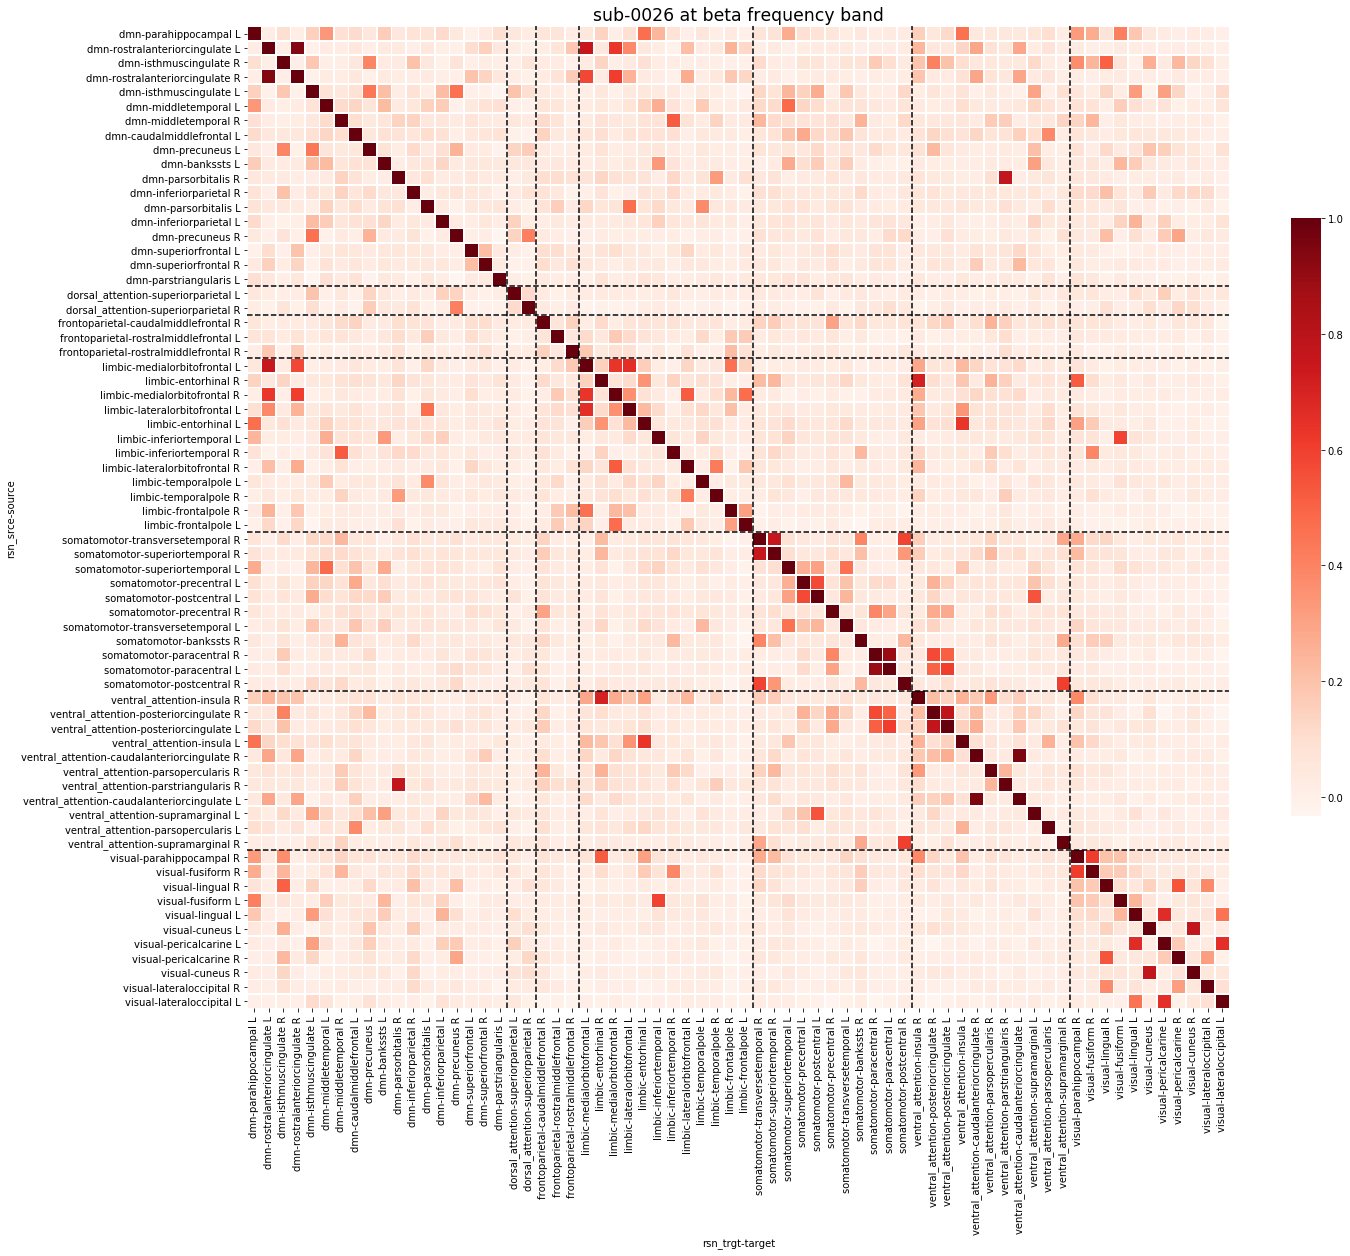

In [14]:
# Go from table to matrix form
aec_temp = aec_matrix.pivot_table(index=['rsn_srce', 'source'], columns= ['rsn_trgt', 'target'], values='corr')

# Create a mean column to order nodes based on node strength
aec_temp['mean'] = aec_temp.as_matrix().mean(axis = 1)
temp_row = aec_temp.reset_index().sort_values(['rsn_srce','mean'], ascending=[True,False], kind='mergesort').set_index(['rsn_srce','source'])
aec_plot = temp_row[temp_row.index.tolist()]

# Set diagonal to zero to bring out patterns
# np.fill_diagonal(aec_plot.values, 0)

# Draw the full plot
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(aec_plot, cmap='Reds', square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})
ax.hlines([18, 20, 23, 35, 46, 57], *ax.get_xlim(), linestyles = 'dashed')
ax.vlines([18, 20, 23, 35, 46, 57], *ax.get_ylim(), linestyles = 'dashed')
plt.title('%s at %s frequency band' % (sub, freq_band), size = 'xx-large')

### Plot connectivity matrix (Resting State Networks)

Text(0.5,1,'sub-0026 at beta frequency band')

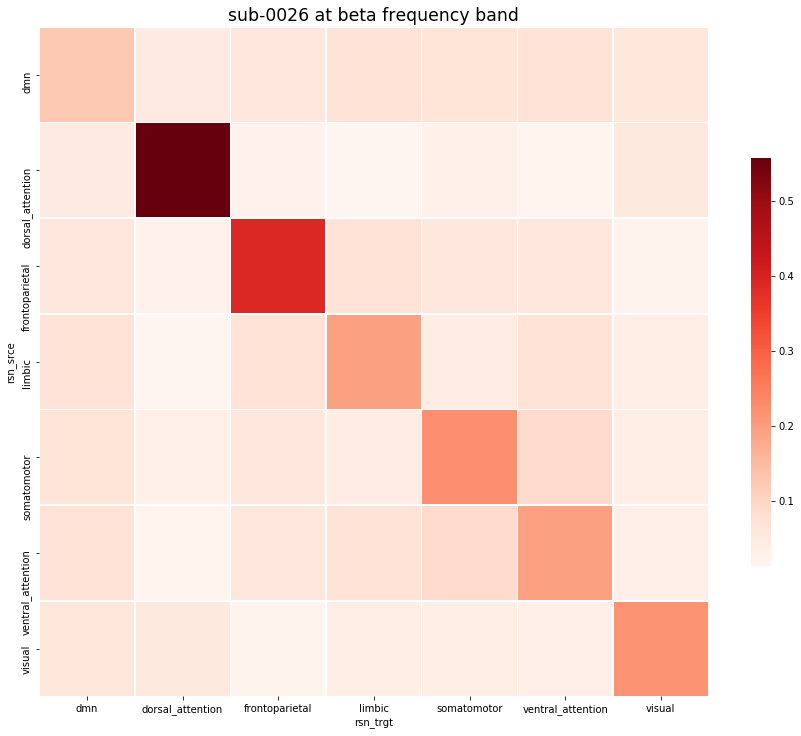

In [15]:
# Data wranling to get mean within each resting state network
aec_temp = aec_matrix.pivot_table(index=['rsn_srce', 'source'], columns= ['rsn_trgt', 'target'], values='corr')
aec_rsn = aec_temp.mean(level= 'rsn_srce').transpose().mean(level= 'rsn_trgt').transpose()

# Draw the full plot
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(aec_rsn, cmap='Reds', square=True, linewidths=.5, 
            cbar_kws={"shrink": .5})
plt.title('%s at %s frequency band' % (sub, freq_band), size = 'xx-large')